In [1]:
using Pkg
#Pkg.add("Pipe")
#Pkg.add("TypedTables")
#Pkg.add(["PlutoUI", "MLJBase"])
Pkg.add("Tables")


    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


In [1]:
using TextAnalysis
using CSV
using DataFrames
using Pipe
using Plots
using TypedTables
using PlutoUI
using MLJBase
using Tables
using Markdown

In [2]:
df=DataFrame(CSV.File("Tweets.csv"))

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason
,Int64,String15,Float64,String31?
1,570306133677760513,neutral,1.0,missing
2,570301130888122368,positive,0.3486,missing
3,570301083672813571,neutral,0.6837,missing
4,570301031407624196,negative,1.0,Bad Flight
5,570300817074462722,negative,1.0,Can't Tell
6,570300767074181121,negative,1.0,Can't Tell
7,570300616901320704,positive,0.6745,missing
8,570300248553349120,neutral,0.634,missing
9,570299953286942721,positive,0.6559,missing


In [3]:
df.text

14640-element Vector{String}:
 "@VirginAmerica What @dhepburn said."
 "@VirginAmerica plus you've added commercials to the experience... tacky."
 "@VirginAmerica I didn't today... Must mean I need to take another trip!"
 "@VirginAmerica it's really aggr" ⋯ 64 bytes ⋯ "&amp; they have little recourse"
 "@VirginAmerica and it's a really big bad thing about it"
 "@VirginAmerica seriously would " ⋯ 73 bytes ⋯ " only bad thing about flying VA"
 "@VirginAmerica yes, nearly ever" ⋯ 17 bytes ⋯ "his “ear worm” won’t go away :)"
 "@VirginAmerica Really missed a " ⋯ 46 bytes ⋯ " there. https://t.co/mWpG7grEZP"
 "@virginamerica Well, I didn't…but NOW I DO! :-D"
 "@VirginAmerica it was amazing, " ⋯ 18 bytes ⋯ "r early. You're too good to me."
 "@VirginAmerica did you know tha" ⋯ 33 bytes ⋯ "ause of death among teens 10-24"
 "@VirginAmerica I &lt;3 pretty g" ⋯ 21 bytes ⋯ "er than minimal iconography. :D"
 "@VirginAmerica This is such a g" ⋯ 77 bytes ⋯ "ven gone on my 1st trip yet! ;p"
 ⋮
 "Thank you

In [4]:
describe(df)

,variable,mean,min
,Symbol,Union…,Any
1,tweet_id,5.69218e17,567588278875213824
2,airline_sentiment,,negative
3,airline_sentiment_confidence,0.900169,0.335
4,negativereason,,Bad Flight
5,negativereason_confidence,0.638298,0.0
6,airline,,American
7,airline_sentiment_gold,,negative
8,name,,0504Traveller
9,negativereason_gold,,Bad Flight


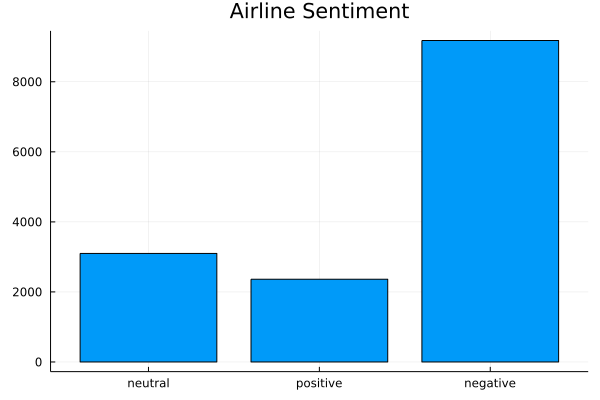

In [6]:
let x = combine(groupby(df, :airline_sentiment),nrow)
    bar(x.airline_sentiment,x.nrow;
    title="Airline Sentiment",label = :none,legend=:topright)

end

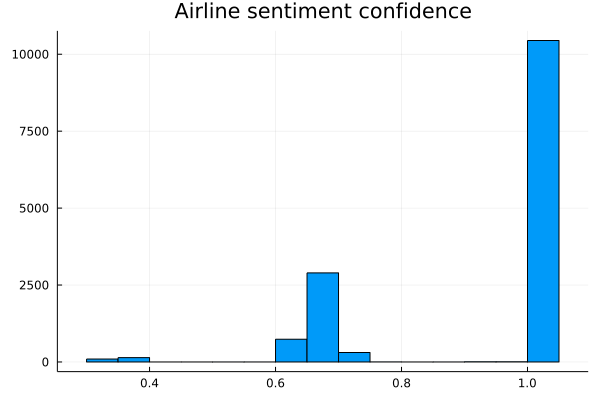

In [10]:
histogram(df.airline_sentiment_confidence;
legend=nothing,title="Airline sentiment confidence")

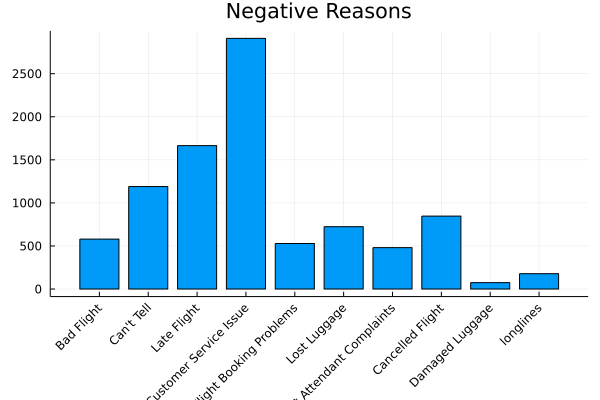

In [11]:
let x = combine(groupby(dropmissing(df, :negativereason), :negativereason), nrow)# Dropping missing values in negativereason
bar(x.negativereason, x.nrow;
title = "Negative Reasons", label = :none, xrotation = 45)
end

In [12]:
function table(nt)
    io = IOBuffer()
    println(io, "|name|value|")
    println(io, "|---:|:----|")
    for k in keys(nt)
        println(io, "|`", k, "`|", nt[k], "|")
    end
    return Markdown.parse(String(take!(io)))
end;

In [13]:
let s = df[36, :text]
    sd = StringDocument(lowercase(s))
    op = 0x00
    op |= strip_punctuation
    op |= strip_stopwords
    op |= strip_html_tags
    prepare!(sd, op)
    stem!(sd)
    table(ngrams(sd))
end

|                     name | value |
| ------------------------:|:----- |
|              `moodlight` | 1     |
|                 `unxtqp` | 1     |
|                   `vibe` | 1     |
|          `moodlitmonday` | 1     |
|          `virginamerica` | 1     |
|                `takeoff` | 1     |
| `sciencebehindtheexperi` | 1     |
|                   `nice` | 1     |
|                `httpcoy` | 1     |
|                      `o` | 1     |
|                     `rt` | 1     |
|                      `7` | 1     |
|              `touchdown` | 1     |
|                      `0` | 1     |


In [14]:
df[36, :text]

"Nice RT @VirginAmerica: Vibe with the moodlight from takeoff to touchdown. #MoodlitMonday #ScienceBehindTheExperience http://t.co/Y7O0uNxTQP"

In [15]:
#Extracting mentions, hash tags, and URL's.
const regexp = Dict(
    :mention => r"@\w+",
    :hashtag => r"#\w+",
    :url => r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F]))+"
);

In [16]:
function extract_tokens(s, token_type)
    return collect(x.match for x in eachmatch(regexp[token_type], s))
end

extract_tokens (generic function with 1 method)

In [17]:
function remove_tokens(s)
    for re in values(regexp)
        s = replace(s,re => "")
    end
    return s
end

remove_tokens (generic function with 1 method)

In [18]:
#Creating new dataframe
begin
    df2 = DataFrame()#Aanmaken df
    df2.airline_sentiment = df.airline_sentiment#kolommen aanmaken
    df2.text = df.text
    df2.mentions = extract_tokens.(df.text, :mention)
    df2.hashtags = extract_tokens.(df.text, :hashtag)
    df2.urls = extract_tokens.(df.text, :url)
    df2.clean_text = lowercase.(remove_tokens.(df.text))
    df2
end;

In [19]:
table(df2[36, :])

|                name | value                                                                                                                                        |
| -------------------:|:-------------------------------------------------------------------------------------------------------------------------------------------- |
| `airline_sentiment` | neutral                                                                                                                                      |
|              `text` | Nice RT @VirginAmerica: Vibe with the moodlight from takeoff to touchdown. #MoodlitMonday #ScienceBehindTheExperience http://t.co/Y7O0uNxTQP |
|          `mentions` | SubString{String}["@VirginAmerica"]                                                                                                          |
|          `hashtags` | SubString{String}["#MoodlitMonday", "#ScienceBehindTheExperience"]                                                                           |
|              `urls` | SubString{String}["http://t.co/Y7O0uNxTQP"]                                                                                                  |
|        `clean_text` | nice rt : vibe with the moodlight from takeoff to touchdown.                                                                                 |


In [28]:
df2.

LoadError: MethodError: no method matching columnnames(::DataFrame)
[0mClosest candidates are:
[0m  columnnames([91m::FlexTable[39m) at ~/.julia/packages/TypedTables/zfbS2/src/FlexTable.jl:72
[0m  columnnames([91m::AbstractArray{<:NamedTuple{names}}[39m) where names at ~/.julia/packages/TypedTables/zfbS2/src/Table.jl:101
[0m  columnnames([91m::Dictionaries.AbstractDictionary{<:Any, <:NamedTuple{names}}[39m) where names at ~/.julia/packages/TypedTables/zfbS2/src/DictTable.jl:178

In [20]:
#Naive bayes classifier

using TextAnalysis: NaiveBayesClassifier, fit!, predict

In [42]:
function create_string_doc(s)
    sd = StringDocument(s)
    op = 0x00
    op |= strip_punctuation
    op |= strip_stopwords
    op |= strip_html_tags
    prepare!(sd, op)
    stem!(sd)
    return sd
end

model = let
    classes = unique(df2.airline_sentiment)
    println(unique(df2.airline_sentiment))
    println(classes)
    nbc = NaiveBayesClassifier(classes)
    for (clean_text, class) in zip(df2.clean_text , df2.airline_sentiment)
        sd = create_string_doc(clean_text)
        fit!(nbc, sd, class)
    end
    println(nbc)
    nbc
end;

String15["neutral", "positive", "negative"]
String15["neutral", "positive", "negative"]


NaiveBayesClassifier{String15}(["plus", "experi", "ad", "commerci", "tacki", "trip", "mean", "recours", "entertain", "blast", "littl", "obnoxi", "guest", "amp", "aggress", "bad", "va", "pay", "flight", "serious", "play", "seat", "fli", "30", "vx", "time", "worm", "near", "ear", "won", "miss", "opportun", "hat", "parodi", "prime", "…", "re", "amaz", "arriv", "hour", "suicid", "lead", "teen", "1024", "caus", "death", "iconographi", "lt", "pretti", "graphic", "minim", "3", "nd", "gone", "1", "st", "deal", "2", "think", "travel", "sky", "thank", "schedul", "sfopdx", "mia", "excit", "lax", "mco", "virgin", "heard", "cross", "countri", "america", "due", "nyc", "sfo", "gentleman", "help", "week", "flew", "sit", "❤️", "☺️👍", "pleas", "awesom", "bosfll", "carrier", "select", "fare", "avail", "love", "innov", "brand", "feel", "hipster", "stop", "anytim", "soon", "bosgtla", "perman", "reserv", "friend", "free", "guy", "mess", "😡", "internet", "respons", "program", "appli", "call", "status", "matc

 "professor", "negat", "amateur", "awesomebright", "habitrail", "vibrant", "tnx", "cough", "bafor", "simplifi", "70435", "shenanigan", "yyzua", "invit", "activitiesprevent", "fallow", "health", "condomrito", "repurchas", "1535", "4727", "turribl", "unaccomid", "280", "1640", "33289", "leah", "anchorag", "protect", "kerri", "ebok", "915", "cdt", "dominican", "tickethotel", "neither", "airsid", "math", "574", "165", "atlhou", "fairbank", "ewrmco", "1641", "aren", "rudest", "😕", "reupgrad", "aquadilla", "sorta", "547", "1564", "withheld", "pti", "punish", "metro", "laugh", "cosmet", "homefamili", "houstonbogota", "energi", "conveyor", "scale", "istanbul", "tkts", "21115", "nonexist", "flighttold", "lli", "144", "stacey", "potus", "dvr", "insuffici", "motion", "determin", "overpr", "par", "sub", "plumber", "overflow", "luxuri", "607", "618", "string", "edit", "william", "ypu", "zuke", "pea", "creativ", "yogurt", "noodl", "hugh", "automobil", "benefici", "longstand", "blah", "shoulda", "fli

", "899", "fsz", "505", "ala", "kc", "hv", "columbus", "spoken", "4040", "omagtden", "3113", "sev", "cx", "vet", "wound", "manchesterbwi", "heal", "idol", "sooooo", "amazing💖", "525", "urg", "forti", "heck", "408", "windi", "unman", "unorgan", "tweak", "skip", "4158", "microsecond", "😂😂😂😂😂😭😭😭😭😢😢😢😢", "after", "corner", "librari", "3899", "portion", "opinion", "grandmoth", "colleagu", "😅", "insist", "go", "tld", "werenot", "whch", "advsri", "chng", "indianapoli", "readili", "😔😔😔", "comcast", "mouth", "3403", "cabl", "portabl", "man", "ventur", "cutoff", "artluggag", "chapman", "kay", "bnardu", "3970", "aunti", "indian", "aruna", "velour", "que", "complic", "dalmdw", "134", "3867", "cockpit", "crutch", "resch", "tmw", "backroad", "stlbos", "ne", "💝", "🚫", "↔️", "😏", "puls", "231", "4315", "launder", "dale", "phoneridicul", "waitin", "approxim", "cxld", "grandkid", "3260", "gun", "louisvill", "supvsr", "gr", "salli", "horror", "implement", "hyperlink", "eve", "sleet", "clarenc", "😜😂", "650

r", "1557", "daniel", "mosaic", "webpag", "8162", "382", "sittin", "birder", "rat", "sloooooow", "jfksfo", "mint", "tim", "1918", "cali", "idk", "homeward", "delinqu", "specifi", "monsoon", "devast", "extralight", "ricoh", "maimi😭", "maimi", "blacklist", "136", "27000", "goodwil", "12500", "1123", "contactless", "emv", "sibl", "diffus", "inflat", "guys😍😍😍", "geek", "the", "0510", "ooookay", "reaction", "tap", "shiver", "815", "sdq", "paseeng", "domingo", "santo", "surfboard", "bqn", "98", "gif", "thng", "prechk", "tank", "alamo", "tatiana", "sj", "aha", "smith", "oust", "2601", "dissatisfiedthank", "1106", "psgrs", "214", "nikon", "reliablefriend", "repexp", "onbrd", "undrstnd", "wlcm", "bulb", "cabcel", "7500", "token", "stair", "untz", "snowbound", "tht", "scent", "deli", "2008", "preffer", "1025", "1117", "crimin", "50000", "inconceiv", "syracus", "increment", "37000", "sea✈️bo", "summit", "hay", "perspect", "599", "1970", "hawaiian", "ventil", "🙌✈️", "hunkydori", "1384", "brolaw", 

ht", "lightn", "struggl", "plead", "grrrr", "2102", "dominick", "guardia", "thanku", "chosen", "offlin", "rodeo", "com", "acarl", "1826", "delayedcancel", "610", "bora", "oprah", "finnair", "phomia", "itineraryconfirm", "tonn", "ma", "laughter", "841", "857", "cinci", "phoneonlin", "contagi", "virus", "tia", "0316", "4473", "bash", "unproduct", "glove", "verif", "quintana", "roo", "pamper", "elabor", "jail", "3841", "bail", "please🙏🙏🙏", "457", "4469", "gainesvill", "tallahasse", "extinct", "ringl", "peel", "bailey", "barnum", "trivial", "pst", "communist", "russia", "ben", "qs", "mundan", "patrick", "inconsider", "pride", "1245", "138", "ultim", "time😡😡😡", "5163", "3751", "flightrexcept", "29", "phlmia", "undelay", "offload", "bwahahaha", "sauc", "544", "clarion", "ummmm", "snap", "hinder", "fudgin", "denphl", "synch", "fudger", "694", "followdm", "poorplan", "518758", "813", "4424", "ampwait", "sav", "southern", "4500", "waaaaaait", "5182", "cent", "1581", "sexual", "detector", "speci

lesthank", "tmr", "lala", "ay", "leather", "marsh", "nutella", "refurbish", "intraeu", "haulba", "exeu", "drain", "potabl", "mcigtdfw", "1119", "burrito", "overzeal", "pns", "wiggl", "sliver", "yayayay", "2448", "1551", "4628", "bueno", "wack", "5348", "chequ", "unknowledg", "vile", "potato", "dcastl", "ballbag", "worrisom", "preoccupi", "flag", "counterpart", "1278", "bsuxlu", "3465", "wherea", "8090", "sgf", "tyr", "3200", "outta", "spk", "tk", "suffici", "reproach", "presum", "reform", "pretsa", "bitchi", "youd", "2401", "3186", "usxlon", "521", "522", "84", "hs", "excess", "timesamp", "uwon", "celeb", "clunki", "2160", "2990176298", "13001885409", "motor", "awheelchair", "miasfo", "countingthank", "scoot", "1103", "restaff", "commenc", "dpdfpp", "argg", "regina", "senseless", "bpdfpp", "platitud", "trite", "embassi", "woodland", "virginia", "13341", "herndon", "20171", "17034640200", "laxogglax", "infobag", "pout", "extenu", "elis", "downstair", "ee", "schd", "chking", "compmech", 

; 2 1 1; 14 12 7; 4 1 2; 2 1 1; 2 1 1; 8 2 21; 38 24 83; 12 3 25; 3 1 9; 116 37 250; 13 14 67; 9 6 47; 17 1 76; 15 2 24; 8 6 9; 43 9 152; 23 13 47; 5 37 7; 11 11 74; 5 6 5; 4 11 14; 5 13 27; 1 3 2; 21 20 119; 4 3 5; 22 11 104; 20 5 136; 2 2 2; 20 15 322; 15 3 94; 6 15 14; 3 3 5; 3 2 3; 23 7 10; 9 20 20; 31 17 40; 8 1 6; 13 12 21; 18 47 43; 71 31 484; 1 1 2; 4 1 4; 7 2 26; 2 3 53; 3 5 2; 1 2 1; 2 2 1; 5 12 16; 6 14 3; 27 3 37; 10 4 5; 9 4 3; 2 2 1; 3 3 4; 2 1 12; 4 1 6; 2 1 1; 18 10 77; 2 1 1; 3 4 4; 4 7 7; 1 2 2; 2 1 5; 13 14 66; 10 3 3; 27 8 140; 100 39 322; 2 1 1; 5 1 7; 1 1 2; 1 1 2; 27 16 53; 1 1 3; 35 40 91; 25 10 654; 1 1 4; 22 6 27; 4 8 8; 3 8 32; 64 44 660; 8 15 220; 2 1 3; 5 1 13; 29 10 82; 111 33 320; 32 8 98; 31 7 54; 12 38 64; 64 161 770; 39 124 778; 8 3 23; 22 18 191; 3 6 24; 9 3 9; 5 3 80; 2 2 6; 3 1 14; 1 1 11; 1 1 2; 5 12 14; 13 81 153; 68 65 596; 9 12 19; 17 6 33; 6 3 49; 3 3 8; 48 29 93; 2 3 1; 3 3 4; 6 2 7; 4 3 9; 14 10 37; 2 1 1; 6 10 18; 7 7 18; 9 8 104; 1 2 54; 13

 1 11; 2 1 2; 3 4 9; 1 1 2; 1 1 3; 3 1 1; 11 2 22; 3 1 1; 3 1 1; 2 1 1; 7 8 19; 3 4 2; 3 1 6; 1 1 3; 6 10 18; 3 1 14; 1 1 2; 2 1 13; 3 1 2; 1 1 12; 1 1 6; 1 2 2; 6 19 14; 8 9 10; 4 2 7; 3 2 33; 3 1 30; 20 9 24; 7 1 2; 3 2 4; 3 2 9; 16 7 16; 7 2 8; 5 4 19; 1 1 3; 1 1 4; 1 1 5; 1 1 2; 1 2 7; 2 2 6; 3 2 11; 4 3 27; 7 1 5; 5 1 1; 3 1 4; 6 1 1; 3 1 2; 6 10 19; 1 2 7; 3 1 15; 5 2 14; 1 1 14; 2 1 2; 3 2 6; 1 1 2; 8 2 15; 3 2 8; 1 1 2; 4 1 3; 6 5 91; 3 3 8; 5 4 1; 7 1 8; 7 3 5; 5 1 5; 2 1 5; 1 1 2; 6 3 16; 4 4 59; 1 1 19; 1 1 2; 1 1 7; 4 6 62; 11 15 32; 2 3 7; 3 1 14; 1 1 2; 1 1 2; 2 1 1; 3 1 2; 8 8 22; 2 6 30; 4 4 12; 1 1 2; 1 1 2; 3 2 5; 3 12 113; 1 4 10; 2 1 2; 2 2 3; 2 1 16; 2 2 8; 2 5 16; 8 1 3; 1 2 7; 2 1 5; 6 3 23; 2 1 1; 1 2 1; 2 1 1; 2 1 1; 6 5 5; 10 3 17; 1 2 61; 1 1 2; 1 1 3; 1 1 6; 5 8 26; 2 1 5; 6 1 15; 3 11 27; 2 23 4; 3 7 25; 1 2 2; 18 1 11; 3 1 1; 2 1 6; 1 6 17; 4 1 8; 1 1 2; 2 1 2; 3 7 17; 1 2 1; 1 2 1; 3 6 33; 2 2 1; 5 4 52; 1 1 4; 1 3 8; 8 4 16; 4 1 7; 2 1 3; 5 1 35; 1 4 6; 

 2; 1 2 4; 1 2 10; 1 1 3; 1 1 2; 3 1 16; 1 1 3; 1 2 4; 3 1 2; 1 1 2; 1 1 2; 1 1 2; 2 1 1; 2 1 1; 1 1 2; 1 1 6; 1 1 2; 1 1 2; 1 3 9; 4 1 10; 4 4 27; 1 3 1; 4 1 1; 16 3 2; 5 1 2; 7 1 20; 1 1 3; 1 1 4; 1 1 3; 7 3 11; 2 1 1; 1 1 2; 1 1 3; 6 1 7; 1 1 3; 1 1 2; 1 1 2; 1 1 3; 1 1 2; 1 2 5; 1 1 2; 1 1 2; 2 1 4; 1 1 4; 1 1 2; 2 1 8; 1 1 3; 1 1 2; 1 1 2; 2 1 5; 5 2 4; 1 1 7; 6 2 8; 1 1 3; 1 1 2; 4 2 7; 1 1 2; 2 2 3; 2 2 3; 1 2 3; 1 1 7; 1 1 4; 2 1 6; 1 1 8; 2 3 4; 1 1 6; 1 1 2; 3 3 2; 1 1 3; 2 1 3; 2 1 3; 2 1 2; 1 1 3; 1 1 2; 1 1 2; 2 1 1; 2 1 1; 1 1 2; 1 2 1; 3 1 7; 3 2 5; 1 1 2; 4 3 7; 1 1 3; 4 1 2; 1 1 2; 1 5 2; 2 1 1; 2 2 3; 2 3 1; 1 1 3; 1 2 6; 3 1 2; 1 1 2; 1 1 4; 1 1 2; 1 1 2; 1 1 2; 1 1 4; 1 1 2; 1 2 4; 1 1 4; 1 1 6; 2 1 8; 1 1 2; 2 2 1; 5 2 2; 2 2 2; 1 2 9; 3 7 5; 1 2 1; 2 4 6; 1 2 7; 1 4 3; 1 4 2; 1 2 1; 2 2 3; 1 2 1; 1 1 2; 1 14 4; 2 1 1; 2 1 1; 4 1 2; 1 1 3; 6 3 8; 3 2 8; 1 1 5; 3 2 6; 2 1 2; 2 1 3; 1 1 2; 1 1 2; 1 2 2; 2 1 1; 5 2 6; 2 1 1; 2 1 1; 2 1 1; 1 1 2; 1 1 4; 1 1 4; 1 1 2; 1

 2; 1 1 2; 2 1 1; 2 1 1; 2 1 1; 1 2 1; 1 3 1; 3 2 5; 1 2 1; 2 1 1; 2 1 3; 2 1 1; 3 1 1; 2 1 1; 3 1 6; 2 1 1; 3 1 2; 1 1 2; 1 1 3; 1 1 2; 1 2 1; 1 1 2; 1 1 2; 1 1 2; 1 1 5; 2 1 8; 1 2 1; 1 1 2; 1 1 3; 1 1 2; 2 1 1; 1 1 2; 2 1 1; 1 1 2; 1 1 4; 1 3 5; 1 2 1; 1 2 1; 1 2 2; 1 3 1; 1 1 2; 2 2 5; 1 2 1; 1 1 3; 1 1 2; 2 1 3; 1 1 3; 1 1 2; 1 1 2; 1 1 2; 1 1 2; 1 1 2; 1 1 4; 1 2 2; 2 1 3; 1 1 3; 1 2 2; 1 1 2; 1 1 2; 1 1 4; 1 2 4; 1 1 2; 2 1 2; 1 1 2; 4 1 1; 2 1 1; 1 1 2; 1 1 2; 1 1 2; 2 1 2; 1 1 2; 1 1 2; 1 2 1; 1 2 1; 2 1 2; 1 1 2; 1 1 7; 1 1 2; 1 1 2; 4 2 6; 3 1 2; 1 1 3; 2 1 2; 1 1 4; 2 1 2; 2 1 4; 2 3 4; 1 1 2; 2 2 3; 1 1 3; 1 1 2; 1 1 2; 1 1 2; 1 1 2; 1 1 2; 1 1 2; 1 1 2; 1 1 2; 2 1 1; 1 1 3; 2 2 5; 1 1 2; 1 1 3; 1 1 2; 1 1 2; 1 2 1; 1 2 1; 1 1 5; 1 1 2; 1 1 2; 1 1 2; 2 1 1; 1 1 2; 1 1 2; 2 3 9; 1 1 3; 1 1 2; 3 1 1; 1 1 2; 1 1 2; 3 2 2; 1 3 2; 8 13 7; 1 1 2; 1 1 3; 1 2 2; 1 4 1; 1 1 2; 3 2 2; 1 1 2; 2 1 2; 1 1 2; 1 1 2; 1 1 2; 1 1 2; 1 1 2; 1 1 2; 1 1 2; 1 2 4; 1 2 2; 2 3 7; 1 2 1; 2 2 1; 1

 3; 1 1 2; 2 1 1; 2 1 2; 2 1 1; 2 1 1; 2 1 1; 1 1 2; 2 1 1; 3 1 5; 2 1 1; 2 1 1; 1 1 2; 1 1 2; 1 1 3; 2 1 8; 1 1 2; 2 1 1; 3 1 1; 5 2 2; 2 1 1; 1 4 3; 1 2 1; 1 1 2; 1 2 1; 1 1 3; 2 1 1; 2 1 2; 2 1 1; 2 1 2; 1 1 3; 1 1 3; 1 3 3; 1 1 2; 1 2 1; 1 3 2; 3 3 4; 2 1 1; 2 1 2; 1 1 2; 1 1 2; 2 1 1; 1 2 4; 1 1 2; 1 1 2; 1 2 1; 2 1 4; 3 2 2; 1 1 2; 1 1 2; 1 1 3; 1 1 2; 1 2 2; 1 2 2; 1 1 2; 1 2 1; 1 2 1; 3 1 1; 2 1 2; 1 2 1; 2 1 1; 2 1 1; 2 1 2; 2 1 1; 2 1 2; 2 1 1; 2 1 1; 4 6 1; 3 2 2; 2 1 1; 3 1 1; 2 1 1; 1 1 2; 1 1 2; 2 1 1; 2 1 1; 1 1 2; 1 1 2; 2 1 1; 1 1 2; 1 1 2; 2 1 2; 2 2 1; 2 1 1; 2 1 1; 1 1 3; 1 1 2; 1 3 1; 1 2 2; 2 1 1; 2 1 5; 2 1 5; 2 1 1; 2 1 1; 2 2 2; 1 2 1; 2 1 1; 2 1 1; 2 1 1; 2 1 1; 2 1 3; 2 2 3; 1 1 2; 1 1 2; 1 1 2; 1 1 2; 1 1 2; 1 1 2; 1 1 2; 1 3 6; 1 1 2; 1 1 2; 1 1 2; 1 1 2; 1 1 2; 2 1 1; 2 1 1; 1 1 2; 1 1 2; 1 1 2; 1 1 3; 1 1 2; 2 1 1; 1 2 1; 1 1 2; 2 1 1; 2 1 1; 2 1 1; 1 1 2; 3 1 1; 2 1 1; 2 1 1; 2 1 1; 3 1 1; 2 1 1; 1 1 5; 1 1 2; 1 1 8; 1 2 1; 2 1 1; 2 1 1; 1 1 2; 1 1 3; 1 

 1 3; 1 1 2; 1 1 2; 1 1 2; 1 2 1; 1 1 2; 1 2 1; 2 1 2; 1 1 2; 1 1 2; 1 1 5; 2 1 2; 2 1 1; 1 1 2; 1 1 2; 2 1 2; 2 1 3; 2 2 9; 1 1 2; 1 1 2; 1 1 2; 2 1 1; 3 1 1; 1 3 1; 1 1 2; 1 1 2; 2 1 1; 2 1 1; 2 1 1; 1 1 2; 1 1 2; 1 1 8; 1 2 2; 1 1 3; 1 1 2; 1 1 2; 1 1 2; 1 1 2; 1 1 2; 1 1 4; 1 1 4; 2 1 3; 1 1 2; 2 1 1; 1 3 1; 1 2 1; 3 1 1; 1 2 5; 1 1 2; 1 1 2; 1 1 2; 1 2 1; 1 1 2; 1 1 2; 1 2 4; 1 2 1; 1 3 2; 2 1 3; 4 1 18; 1 1 4; 1 1 2; 1 1 2; 2 1 2; 1 1 2; 1 1 2; 1 1 2; 1 1 3; 1 1 3; 2 1 2; 2 1 3; 1 1 4; 1 1 2; 1 1 2; 1 1 3; 2 1 3; 1 1 2; 1 1 2; 1 1 3; 1 1 4; 1 1 2; 2 1 2; 1 1 2; 1 1 2; 1 1 5; 1 1 2; 1 1 2; 1 1 2; 1 1 2; 1 1 2; 1 1 2; 1 1 2; 2 1 4; 1 1 2; 1 1 2; 1 1 2; 1 1 2; 1 1 3; 1 1 2; 2 1 1; 2 1 1; 2 1 1; 2 1 2; 2 1 1; 1 1 2; 1 1 2; 1 1 2; 2 1 1; 2 1 1; 1 1 2; 1 2 1; 2 1 1; 1 2 1; 1 2 1; 1 2 1; 1 1 2; 1 2 1; 1 1 3; 1 1 3; 1 1 2; 1 1 2; 1 2 1; 1 2 1; 1 2 1; 1 1 3; 1 1 2; 1 1 2; 2 1 5; 1 1 2; 2 1 2; 1 1 4; 1 1 3; 3 1 1; 2 1 1; 2 1 2; 1 1 2; 1 1 2; 1 1 2; 2 1 4; 1 1 2; 1 1 2; 1 1 2; 1 1 6; 1 1 2;

 1 3; 1 1 2; 1 1 2; 1 1 2; 1 1 4; 1 1 3; 1 1 2; 1 1 2; 1 1 4; 2 1 1; 2 1 1; 1 1 3; 1 1 2; 1 1 2; 1 2 2; 1 2 1; 1 1 2; 1 1 2; 1 1 2; 1 1 2; 1 1 2; 1 1 2; 1 1 2; 1 2 1; 1 1 2; 1 1 2; 1 1 2; 1 1 2; 2 1 1; 1 1 2; 2 1 1; 1 1 2; 1 2 2; 1 1 2; 1 1 3; 1 1 2; 1 1 2; 1 1 3; 1 1 2; 1 1 2; 1 1 2; 2 1 1; 1 1 2; 1 1 2; 1 1 2; 1 1 3; 1 1 2; 2 1 1; 1 1 2; 1 1 2; 1 1 2; 1 1 2; 1 2 1; 1 1 2; 1 1 2; 2 1 1; 2 1 1; 1 1 2; 1 1 2; 1 2 1; 1 1 2; 1 1 2; 1 1 2; 1 2 1; 1 1 2; 1 1 2; 1 1 2; 1 1 2; 1 1 3; 1 1 2; 1 1 2; 1 1 2; 1 1 2; 1 2 1; 1 2 1; 1 2 1; 1 1 2; 1 1 2; 1 1 2; 1 1 2; 1 1 2; 1 1 2; 2 2 1; 1 1 2; 1 1 2; 1 1 2; 1 1 2; 1 1 2; 1 1 2; 1 1 2; 1 1 2; 1 1 2; 1 2 1; 1 1 2; 2 1 1; 1 1 2; 1 1 2; 1 1 2; 1 1 2; 1 1 2; 1 1 2; 1 1 2; 1 1 2; 1 1 2; 1 1 2; 1 1 2; 1 1 2; 1 1 4; 1 1 2; 2 1 1; 1 1 3; 1 1 3; 1 1 2; 1 1 2; 1 1 4; 1 3 1; 1 2 1; 1 1 2; 1 1 2; 1 1 3; 2 1 1; 1 1 2; 1 1 2; 2 1 1; 2 1 1; 2 1 1; 2 1 1; 1 1 2; 1 1 2; 1 1 2; 1 1 2; 1 1 2; 1 1 2; 2 1 1; 1 1 2; 1 1 2; 1 1 2; 1 1 2; 1 1 2; 1 1 2; 1 1 2; 2 1 1; 2 1 1; 

In [43]:
println("d")

d


In [36]:
function test_model(model, tweets) # Bayes method
    df = DataFrame(text = tweets)
    df.doc = TextAnalysis.text.(create_string_doc.(remove_tokens.(tweets)))
    println(df.doc)
    df.analysis = predict.(Ref(model), df.doc)
    println(df.analysis)
    df.positive = getindex.(df.analysis, "positive")
    df.negative = getindex.(df.analysis, "negative")
    df.neutral = getindex.(df.analysis, "neutral")
    select!(df, Not(:analysis))
    return df
end;

In [37]:
let
tweets = [
    "whatever airline sucks!",
    "i love @american service :-)",
    "just ok",
    "hello world",
    "i hate this game"]
    test_model(model, tweets)
end

["whatev airlin suck", "love servic", "ok", "hello world", "hate game"]
Dict{String15, Float64}[Dict("negative" => 0.8524534952689944, "positive" => 0.11206659716743787, "neutral" => 0.03547990756356774), Dict("negative" => 0.13609038738908869, "positive" => 0.7957549974436533, "neutral" => 0.06815461516725786), Dict("negative" => 0.2020013257258475, "positive" => 0.46235026947877794, "neutral" => 0.33564840479537456), Dict("negative" => 0.12066974880152374, "positive" => 0.18688142984833075, "neutral" => 0.6924488213501454), Dict("negative" => 0.4550174075698807, "positive" => 0.14421484513558483, "neutral" => 0.40076774729453446)]


,text,doc,positive,negative,neutral
,String,String,Float64,Float64,Float64
1,whatever airline sucks!,whatev airlin suck,0.112067,0.852453,0.0354799
2,i love @american service :-),love servic,0.795755,0.13609,0.0681546
3,just ok,ok,0.46235,0.202001,0.335648
4,hello world,hello world,0.186881,0.12067,0.692449
5,i hate this game,hate game,0.144215,0.455017,0.400768


In [ ]:
#Determing accuracy of bayes

In [69]:
#As the predict function returns a Dict object with the probabilities assigned to each class, we need
#to choose the best option. Let's de ne a function for that.

function predict_and_choose(c::NaiveBayesClassifier, sd::StringDocument)
    val = predict(c, sd)
    return argmax(val)
end;

In [71]:
#Now, make prediction over all 14K tweets.
yhat = let sds = create_string_doc.(lowercase.(remove_tokens.(df2.text)))
    predict_and_choose.(Ref(model), sds)
end;

In [75]:
hits = count(df2.airline_sentiment .== yhat)

12112

In [76]:
misses = length(yhat) - hits

2528

In [88]:
println(nrow(df2))

14640


In [78]:
accuracy_percentage_hits = hits / (hits + misses) * 100

82.73224043715847

In [90]:
slightly_off_percentage = (misses) / (hits + misses) * 100

17.26775956284153

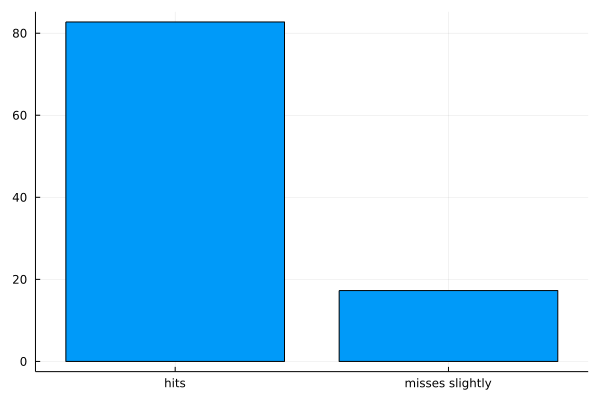

In [92]:
bar(["hits", "misses slightly"],
[accuracy_percentage_hits, slightly_off_percentage];
legend = :none)